<a href="https://colab.research.google.com/github/darrencheninfo/ADS504_G1_Project/blob/main/ADS504_finalproj_EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data & Libraries


In [1]:
#library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import data
df = pd.read_csv("/content/drive/MyDrive/ADS 504 | Final Project/diabetes_features_engineered.csv")
df.head()

,Unnamed: 0,SEXVAR,GENHLTH,PHYSHLTH,POORHLTH,EXERANY2,FALL12MN,FALLINJ5,_URBSTAT,_IMPRACE,...,Proactive_Care_Score,Access_to_Care_Score,Alcohol_Abuse_Indicator,Tobacco_Score,social_score,Marijuana_Score,Cognitive_Score,BMI_Value,BMI_Category,Region
0,0,2.0,3.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,...,2,3,NaN,8.0,1,0.0,0.0,39.475098,Obese,Pacific
1,1,1.0,2.0,1.0,1.0,1.0,0.0,NaN,1.0,1.0,...,3,3,0.0,4.0,0,0.0,0.0,23.170166,Normal,Pacific
2,2,2.0,3.0,0.0,0.0,2.0,0.0,NaN,1.0,1.0,...,3,3,NaN,6.0,0,0.0,0.0,25.603538,Overweight,Pacific
3,3,2.0,2.0,0.0,NaN,2.0,0.0,NaN,1.0,1.0,...,2,2,NaN,4.0,0,0.0,0.0,42.961111,Obese,Pacific
4,4,2.0,5.0,30.0,25.0,2.0,0.0,NaN,1.0,1.0,...,1,2,NaN,4.0,2,0.0,0.0,NaN,NaN,Pacific


# Basic Data Information

In [3]:
#get shape
df.shape

(20069, 24)

In [4]:
df.columns

Index(['Unnamed: 0', 'SEXVAR', 'GENHLTH', 'PHYSHLTH', 'POORHLTH', 'EXERANY2',
       'FALL12MN', 'FALLINJ5', '_URBSTAT', '_IMPRACE', '_AGE80',
       'Diabetes_Comorbidity_Score', 'Diabetic_Care_Score', 'Disability_Score',
       'Proactive_Care_Score', 'Access_to_Care_Score',
       'Alcohol_Abuse_Indicator', 'Tobacco_Score', 'social_score',
       'Marijuana_Score', 'Cognitive_Score', 'BMI_Value', 'BMI_Category',
       'Region'],
      dtype='object')

In [5]:
#are there duplicates?
df.duplicated().sum()

np.int64(0)

In [6]:
#get datatypes
df.dtypes

,0
Unnamed: 0,int64
SEXVAR,float64
GENHLTH,float64
PHYSHLTH,float64
POORHLTH,float64
EXERANY2,float64
FALL12MN,float64
FALLINJ5,float64
_URBSTAT,float64
_IMPRACE,float64


In [7]:
# is there class imbalance?
df['Diabetes_Comorbidity_Score'].value_counts()

,count
Diabetes_Comorbidity_Score,
1.0,5934
0.0,4698
2.0,4261
3.0,2642
4.0,1411
5.0,683
6.0,295
7.0,101
8.0,37


<Axes: xlabel='Diabetes_Comorbidity_Score', ylabel='count'>

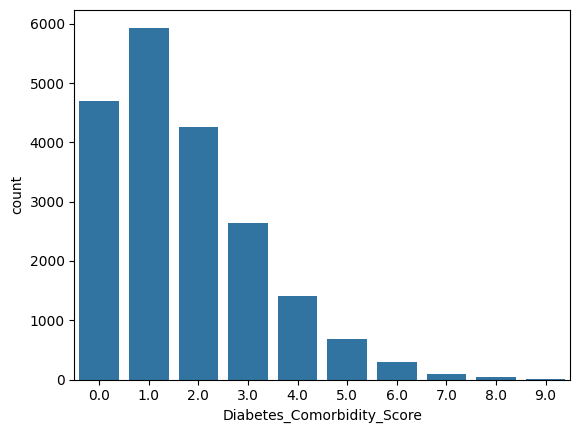

In [8]:
sns.countplot(x='Diabetes_Comorbidity_Score', data=df)

In [9]:
#percentage of each class
print("percentage of each class", df['Diabetes_Comorbidity_Score'].value_counts()/len(df)*100)

percentage of each class Diabetes_Comorbidity_Score
1.0    29.567990
0.0    23.409238
2.0    21.231750
3.0    13.164582
4.0     7.030744
5.0     3.403259
6.0     1.469929
7.0     0.503264
8.0     0.184364
9.0     0.034880
Name: count, dtype: float64


# Data Quality Report

## Continuous Features

In [10]:
# identify continuous features
conf = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
conf

['Unnamed: 0',
 'SEXVAR',
 'GENHLTH',
 'PHYSHLTH',
 'POORHLTH',
 'EXERANY2',
 'FALL12MN',
 'FALLINJ5',
 '_URBSTAT',
 '_IMPRACE',
 '_AGE80',
 'Diabetes_Comorbidity_Score',
 'Diabetic_Care_Score',
 'Disability_Score',
 'Proactive_Care_Score',
 'Access_to_Care_Score',
 'Alcohol_Abuse_Indicator',
 'Tobacco_Score',
 'social_score',
 'Marijuana_Score',
 'Cognitive_Score',
 'BMI_Value']

In [11]:
#identify any columns to filter out from the "continuous features"
conf_exclude = ['Unnamed: 0']
filter_conf = [x for x in conf if x not in conf_exclude]
filter_conf

['SEXVAR',
 'GENHLTH',
 'PHYSHLTH',
 'POORHLTH',
 'EXERANY2',
 'FALL12MN',
 'FALLINJ5',
 '_URBSTAT',
 '_IMPRACE',
 '_AGE80',
 'Diabetes_Comorbidity_Score',
 'Diabetic_Care_Score',
 'Disability_Score',
 'Proactive_Care_Score',
 'Access_to_Care_Score',
 'Alcohol_Abuse_Indicator',
 'Tobacco_Score',
 'social_score',
 'Marijuana_Score',
 'Cognitive_Score',
 'BMI_Value']

In [12]:
#get summary stats on continuous
df[filter_conf].describe()

,SEXVAR,GENHLTH,PHYSHLTH,POORHLTH,EXERANY2,FALL12MN,FALLINJ5,_URBSTAT,_IMPRACE,_AGE80,...,Diabetic_Care_Score,Disability_Score,Proactive_Care_Score,Access_to_Care_Score,Alcohol_Abuse_Indicator,Tobacco_Score,social_score,Marijuana_Score,Cognitive_Score,BMI_Value
count,20069.000000,20003.000000,19379.000000,12399.000000,19990.000000,18197.000000,6542.000000,19045.000000,20069.000000,20069.000000,...,20069.000000,20069.000000,20069.000000,20069.000000,6616.000000,20069.000000,20069.000000,20069.000000,20069.000000,18450.000000
mean,1.518511,3.285207,7.910625,7.933382,1.406203,1.195802,0.881535,1.183880,1.799841,65.937665,...,0.620958,0.963974,2.132792,2.627684,0.089480,5.731427,0.603568,0.034431,0.314116,31.883369
std,0.499670,0.994181,11.302672,11.015040,0.491136,4.082743,2.599589,0.387397,1.512801,11.427984,...,0.718419,1.268887,1.327465,0.763232,0.285457,2.509861,1.263634,0.261777,0.972919,7.343079
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.069330
25%,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,59.000000,...,0.000000,0.000000,1.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,27.020159
50%,2.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,68.000000,...,0.000000,0.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,30.782249
75%,2.000000,4.000000,14.000000,15.000000,2.000000,1.000000,1.000000,1.000000,2.000000,75.000000,...,1.000000,2.000000,3.000000,3.000000,0.000000,8.000000,1.000000,0.000000,0.000000,35.437933
max,2.000000,5.000000,30.000000,30.000000,2.000000,76.000000,76.000000,2.000000,6.000000,80.000000,...,3.000000,6.000000,6.000000,4.000000,1.000000,11.000000,9.000000,5.000000,5.000000,195.977306


In [13]:
data_quality_conf = pd.DataFrame({
    'Feature': filter_conf,
    'Count': df[filter_conf].count().values,
    'Missing Values': df[filter_conf].isnull().sum().values,
    'Cardinality': df[filter_conf].nunique().values,
    'Min': df[filter_conf].min().values,
    '1st Quartile': df[filter_conf].quantile(0.25).values,
    'Mean': df[filter_conf].mean().values,
    'Median': df[filter_conf].median().values,
    '3rd Quartile': df[filter_conf].quantile(0.75).values,
    'Max': df[filter_conf].max().values,
    'Standard Deviation': df[filter_conf].std().values,
})
data_quality_conf

,Feature,Count,Missing Values,Cardinality,Min,1st Quartile,Mean,Median,3rd Quartile,Max,Standard Deviation
0,SEXVAR,20069,0,2,1.00000,1.000000,1.518511,2.000000,2.000000,2.000000,0.499670
1,GENHLTH,20003,66,5,1.00000,3.000000,3.285207,3.000000,4.000000,5.000000,0.994181
2,PHYSHLTH,19379,690,31,0.00000,0.000000,7.910625,1.000000,14.000000,30.000000,11.302672
3,POORHLTH,12399,7670,31,0.00000,0.000000,7.933382,2.000000,15.000000,30.000000,11.015040
4,EXERANY2,19990,79,2,1.00000,1.000000,1.406203,1.000000,2.000000,2.000000,0.491136
5,FALL12MN,18197,1872,32,0.00000,0.000000,1.195802,0.000000,1.000000,76.000000,4.082743
6,FALLINJ5,6542,13527,22,0.00000,0.000000,0.881535,0.000000,1.000000,76.000000,2.599589
7,_URBSTAT,19045,1024,2,1.00000,1.000000,1.183880,1.000000,1.000000,2.000000,0.387397
8,_IMPRACE,20069,0,6,1.00000,1.000000,1.799841,1.000000,2.000000,6.000000,1.512801
9,_AGE80,20069,0,63,18.00000,59.000000,65.937665,68.000000,75.000000,80.000000,11.427984


## Categorical Features

In [14]:
#identify any categorical features
catf = df.select_dtypes(include=['object']).columns.tolist()
catf

['BMI_Category', 'Region']

In [15]:
#identify any columns to filter out from the "categorical features"
catf_exclude = ['']
filter_catf = [x for x in catf if x not in catf_exclude]
filter_catf

['BMI_Category', 'Region']

In [16]:
#create lists to store modes & frequencies
modes = []
mode_freqs = []
second_modes = []
second_mode_freqs = []
mode_percentages = []
second_mode_percentages = []

In [17]:
# Calculate mode and frequency for each categorical feature
for feature in filter_catf:
    count = df[feature].count()
    mode = df[feature].mode().iloc[0]
    mode_freq = df[feature].value_counts().iloc[0]
    modes.append(mode)
    mode_freqs.append(mode_freq)
    mode_percentages.append((mode_freq / count) * 100 if count > 0 else 0)

    # Calculate second mode and its frequency
    if len(df[feature].value_counts()) > 1:
        second_mode = df[feature].value_counts().index[1]
        second_mode_freq = df[feature].value_counts().iloc[1]
    else:
        second_mode = None
        second_mode_freq = 0

    second_modes.append(second_mode)
    second_mode_freqs.append(second_mode_freq)
    second_mode_percentages.append((second_mode_freq / count) * 100 if count > 0 else 0)

In [18]:
# Get unique values and counts
cat_count = df[filter_catf].value_counts(ascending = False)
cat_count

BMI_Category  Region            
Obese         East North Central    2587
              West North Central    2040
Overweight    East North Central    1321
Obese         New England           1090
Overweight    West North Central    1070
Obese         South Atlantic        1064
              West South Central     832
              Mountain               797
              Pacific                737
Overweight    New England            681
              South Atlantic         637
              Mountain               492
              Pacific                488
Normal        East North Central     484
Overweight    West South Central     480
Obese         East South Central     415
Normal        West North Central     413
Obese         Middle Atlantic        382
Overweight    Middle Atlantic        299
Normal        South Atlantic         257
              West South Central     250
              New England            242
              Pacific                222
              Mountain               211
Overweight    East South Central     196
Normal        Middle Atlantic        118
              East South Central      85
Underweight   West North Central      21
              East North Central      19
              West South Central      16
              South Atlantic          15
              Pacific                 13
              Middle Atlantic          5
              Mountain                 5
              East South Central       5
              New England              3
Name: count, dtype: int64

In [19]:
#build quality report table
data_quality_catf = pd.DataFrame({
    'Feature': filter_catf,
    'Count': df[filter_catf].count().values,
    'Missing Values': df[filter_catf].isnull().sum().values,
    'Cardinality': df[filter_catf].nunique().values,
    'Mode':modes,
    'Mode Frequency':mode_freqs,
    'Mode %': mode_percentages,
    '2nd Mode':second_modes,
    '2nd Mode Frequency': second_mode_freqs,
    '2nd Mode %': second_mode_percentages,
})
data_quality_catf

,Feature,Count,Missing Values,Cardinality,Mode,Mode Frequency,Mode %,2nd Mode,2nd Mode Frequency,2nd Mode %
0,BMI_Category,18450,1619,4,Obese,10140,54.959350,Overweight,5829,31.593496
1,Region,19579,490,9,East North Central,4823,24.633536,West North Central,3844,19.633281


# Univariate Analysis

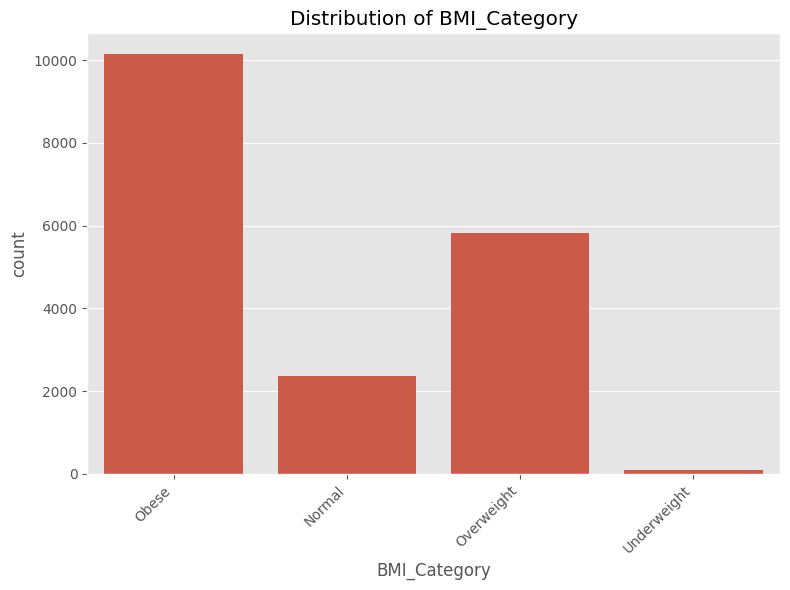

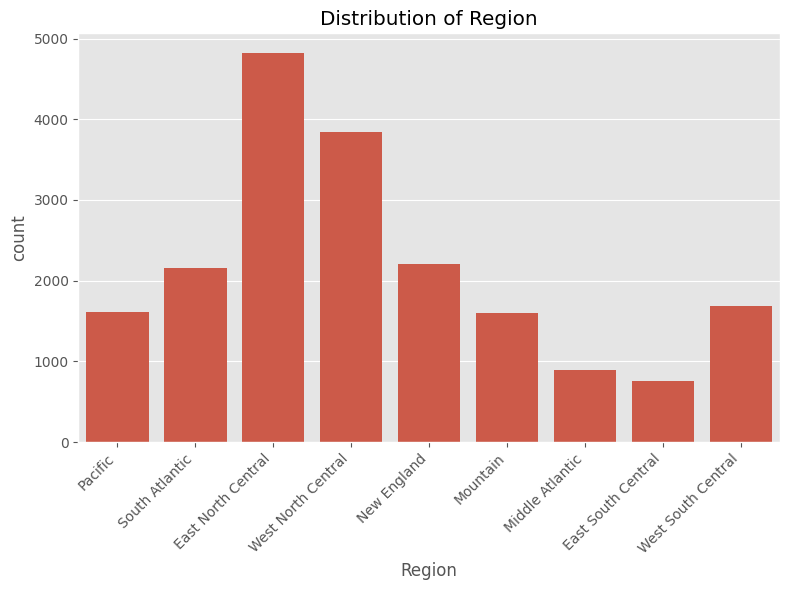

In [20]:
#plot the categorical variables
plt.style.use('ggplot')

for column in filter_catf:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

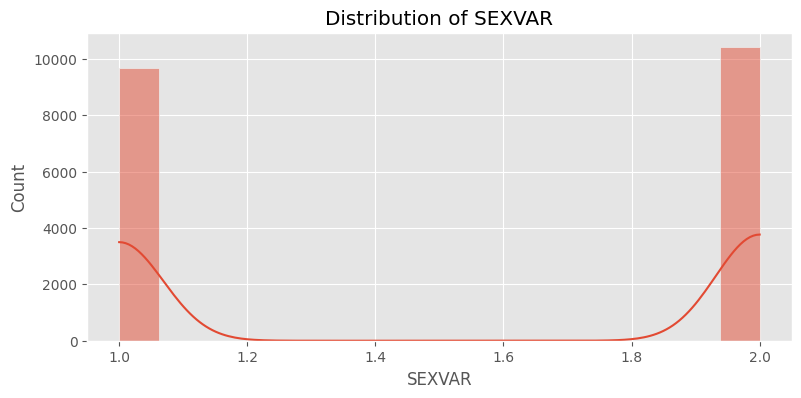

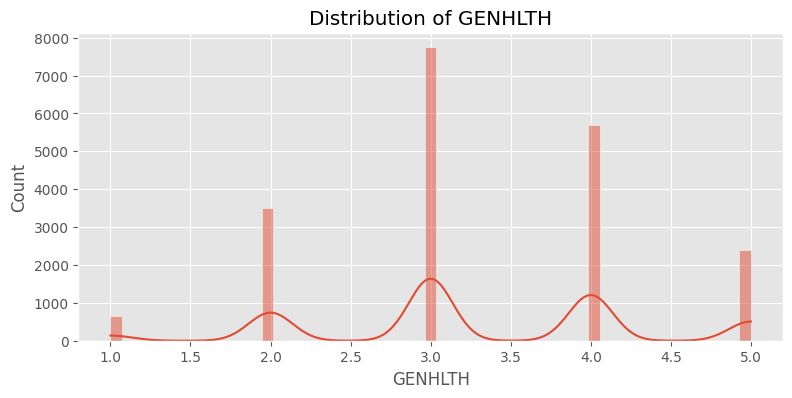

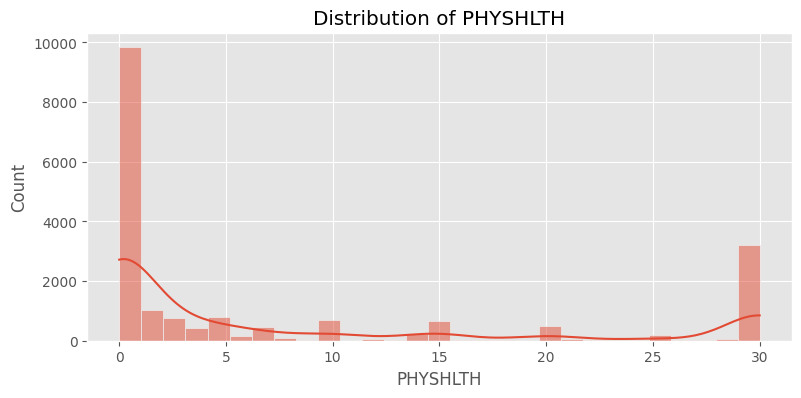

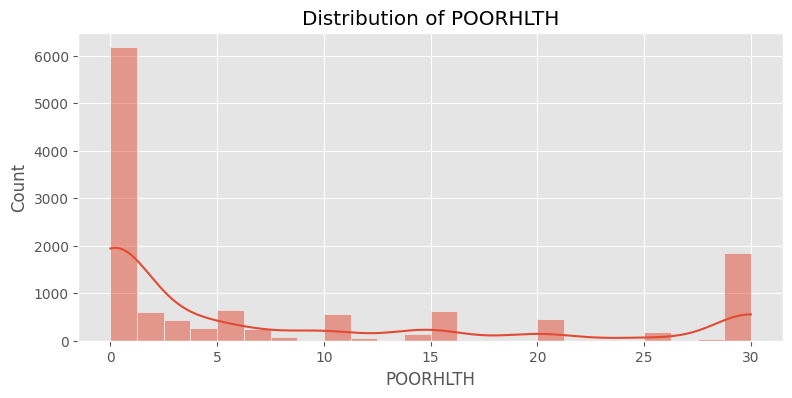

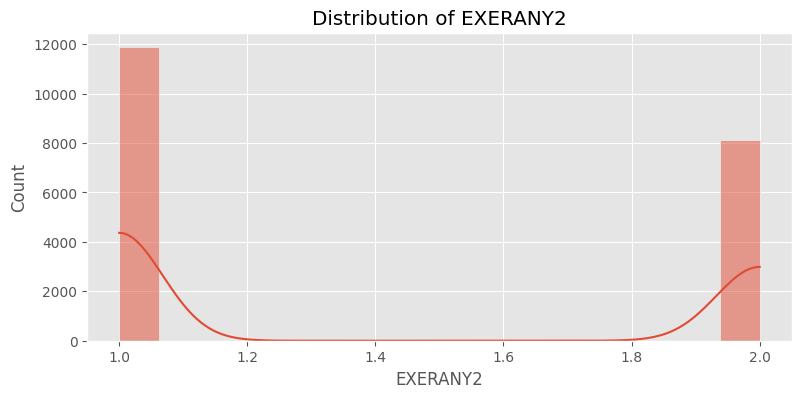

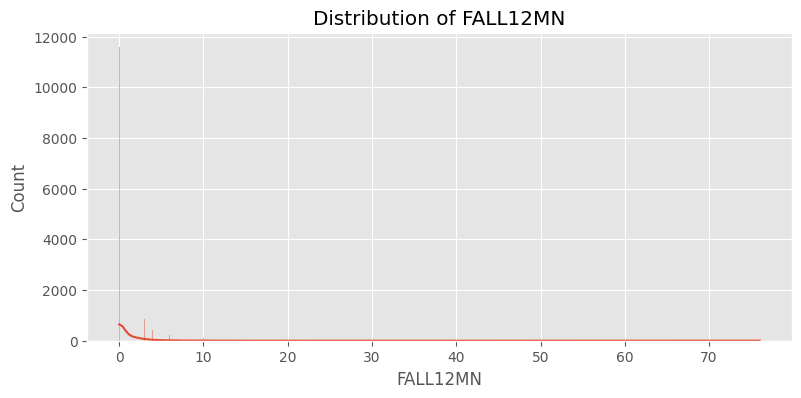

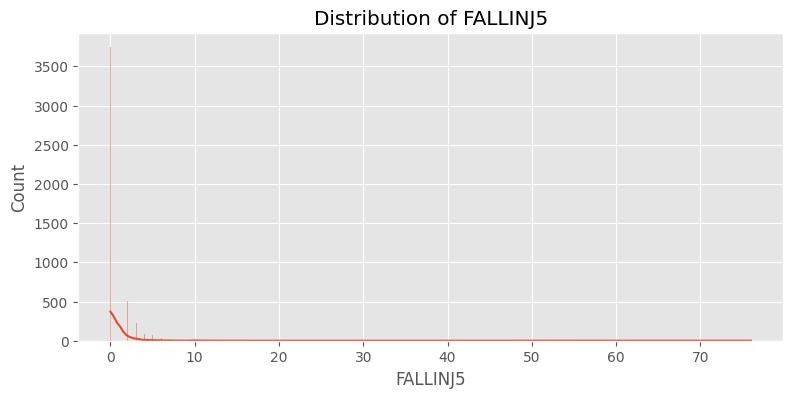

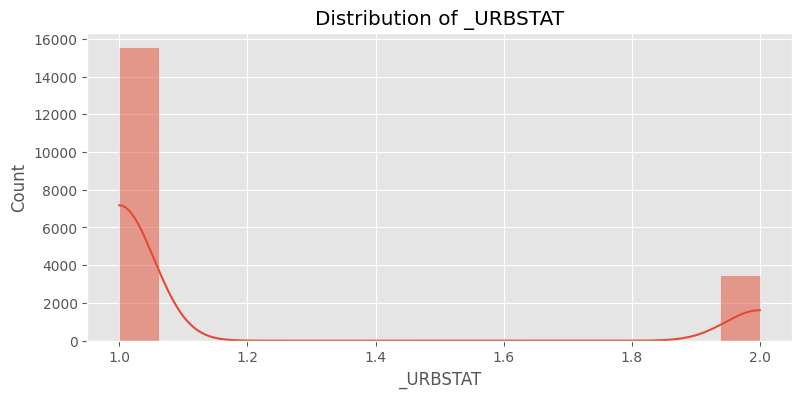

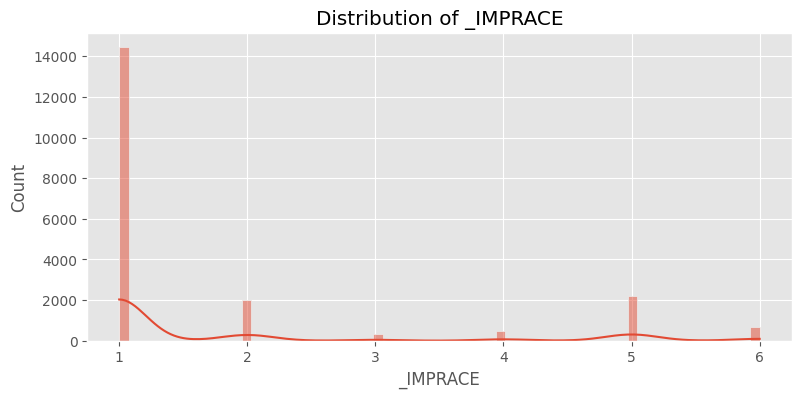

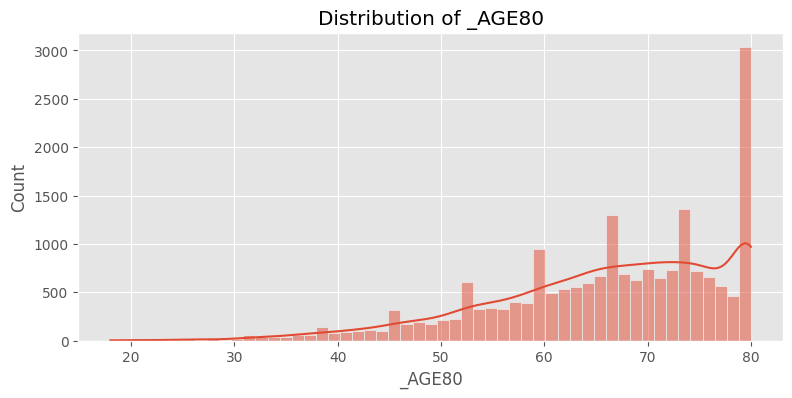

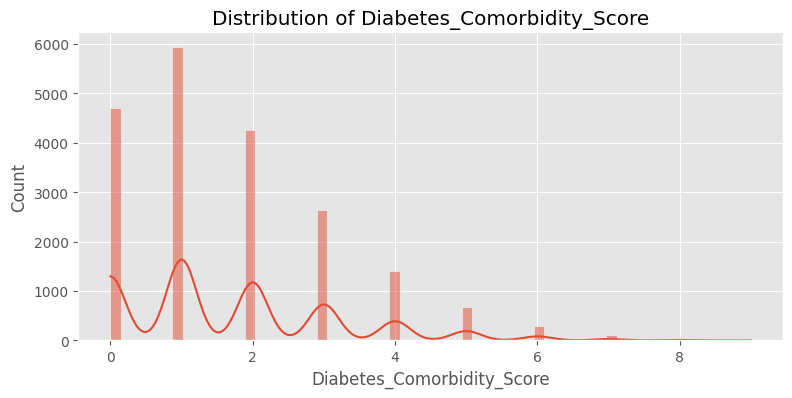

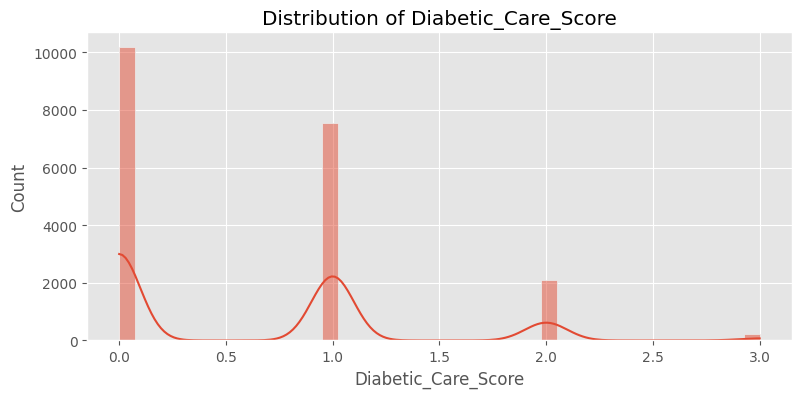

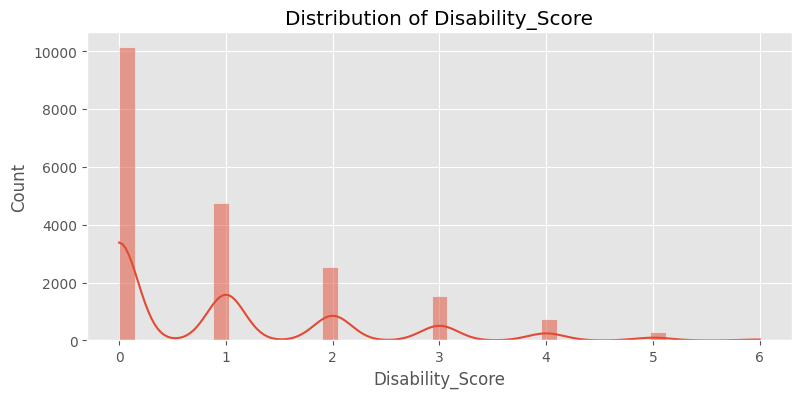

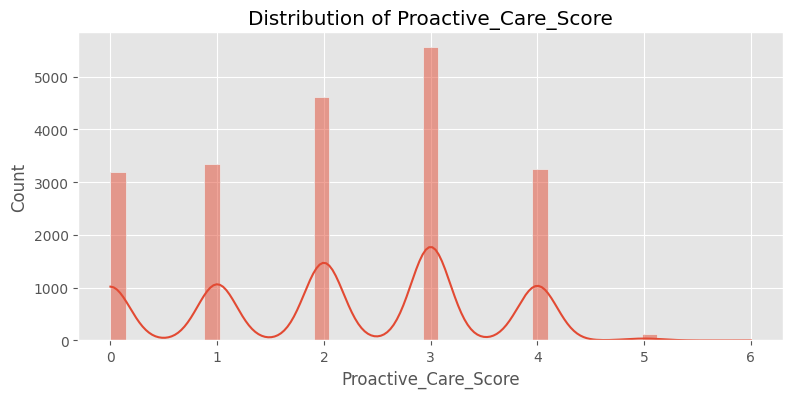

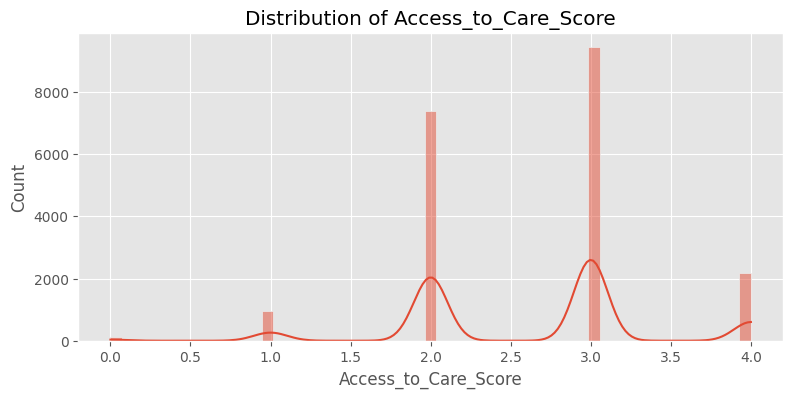

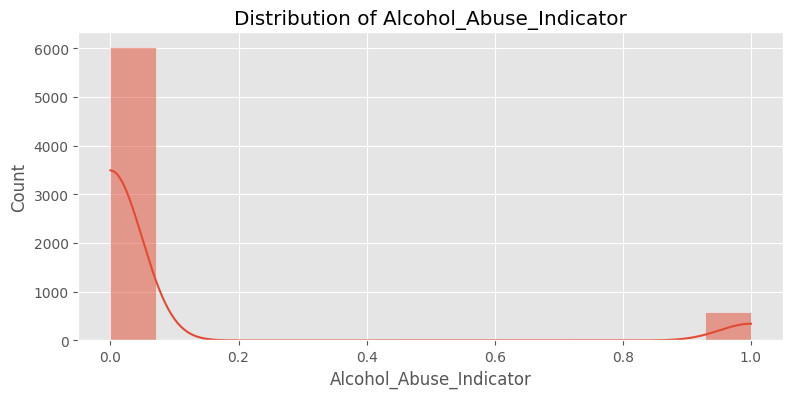

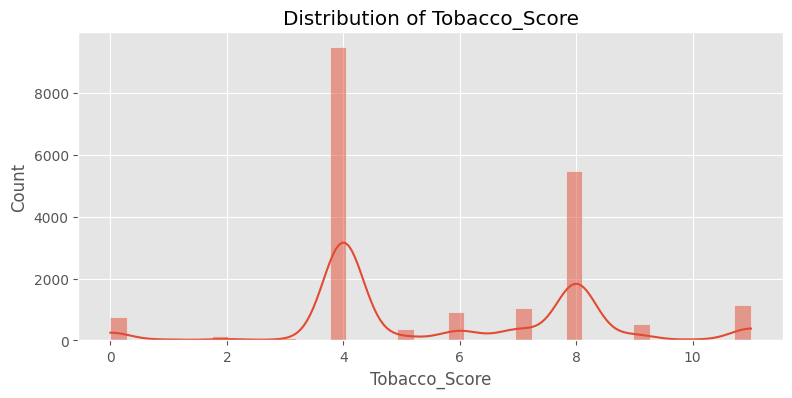

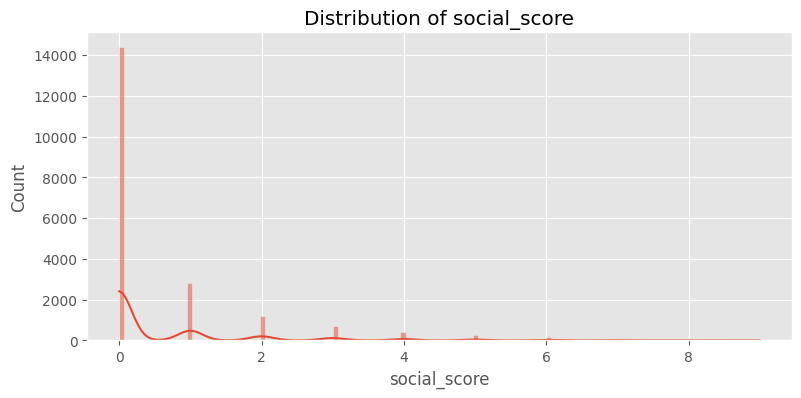

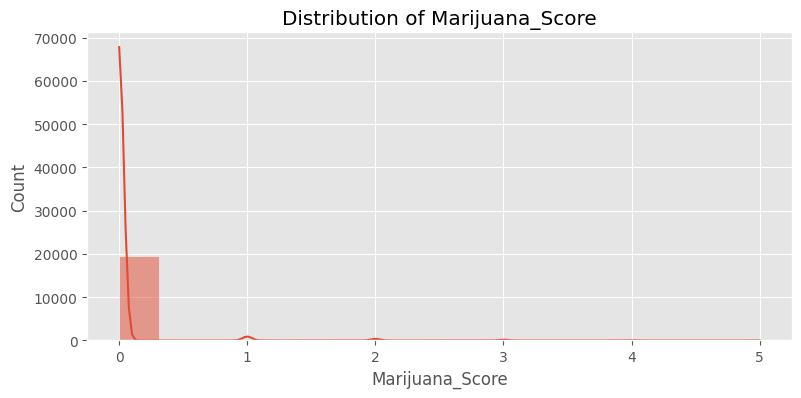

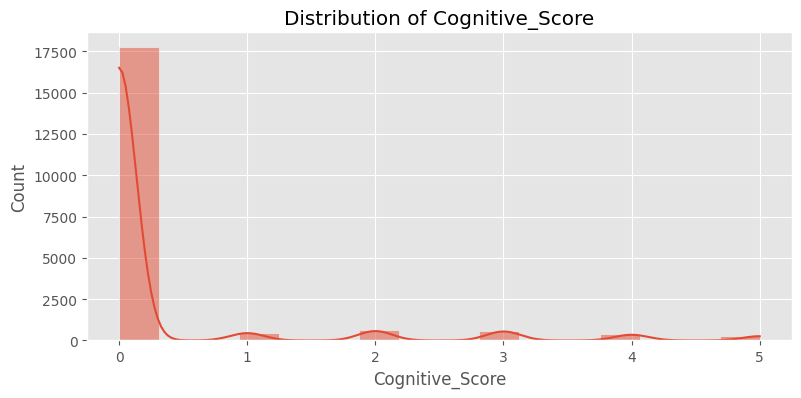

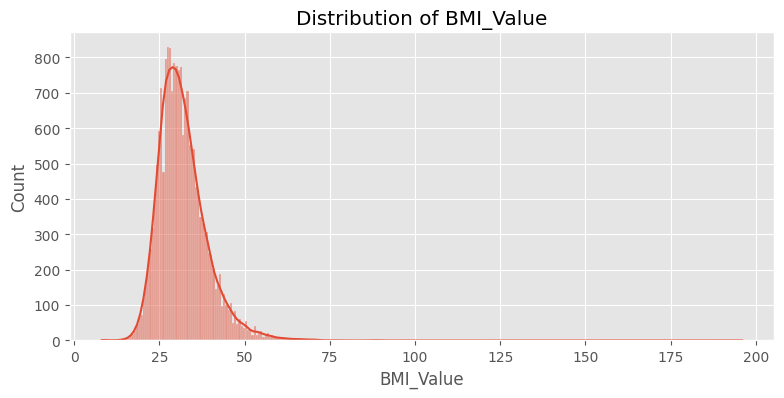

In [21]:
#plot histograms for numerical variables
plt.style.use('ggplot')
for column in filter_conf:
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde = True)
    plt.title(f'Distribution of {column}')
    plt.show()

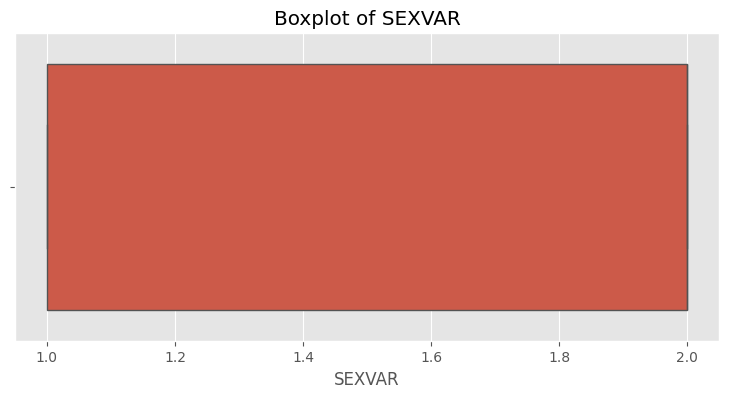

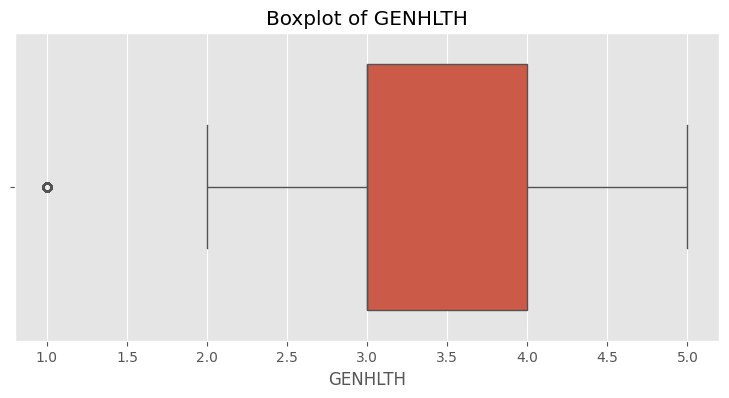

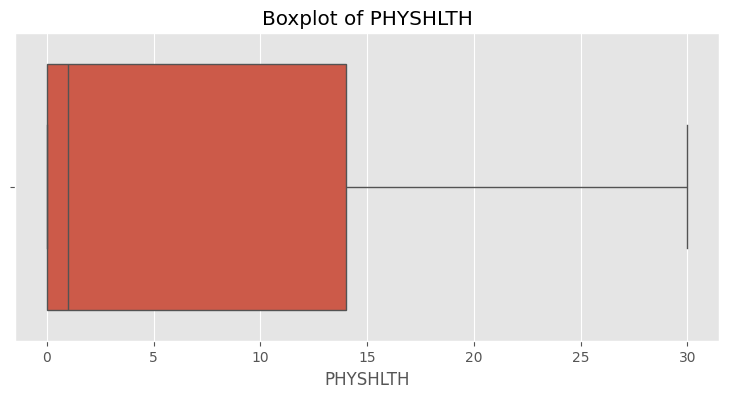

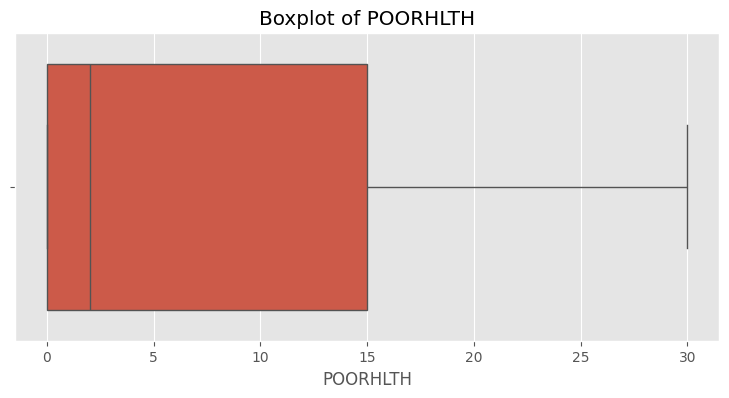

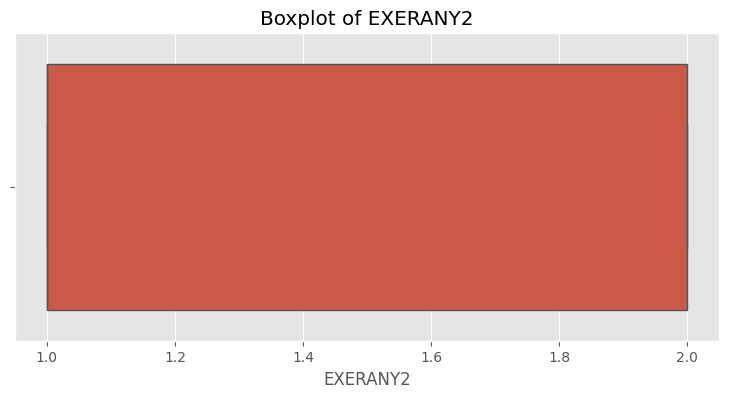

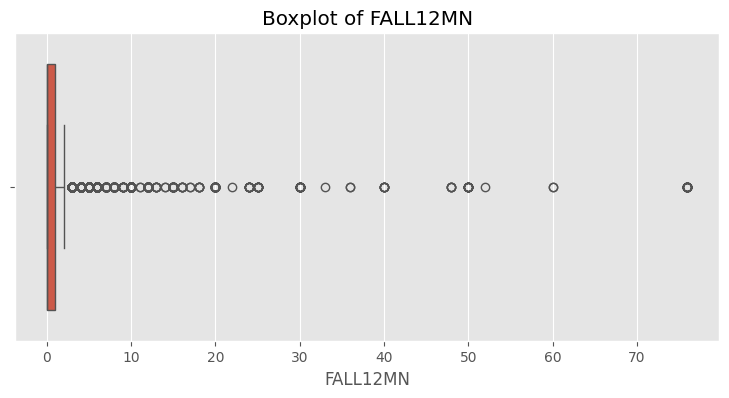

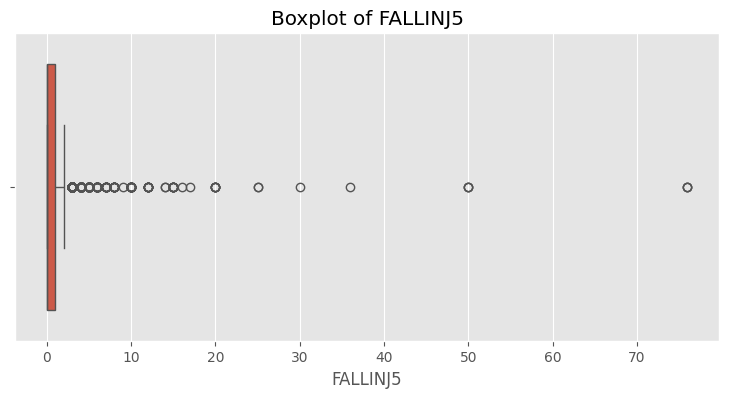

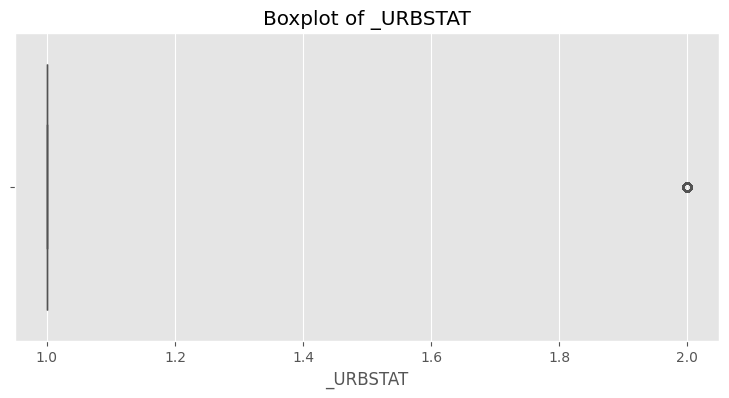

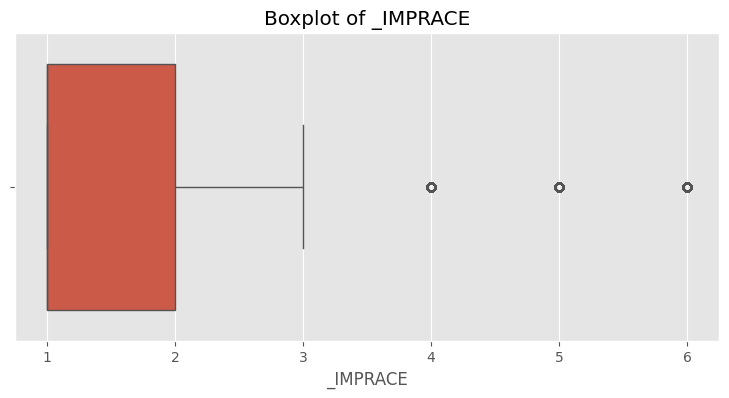

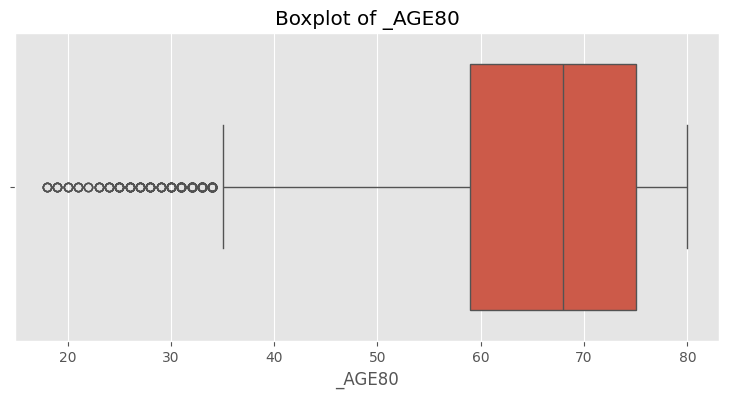

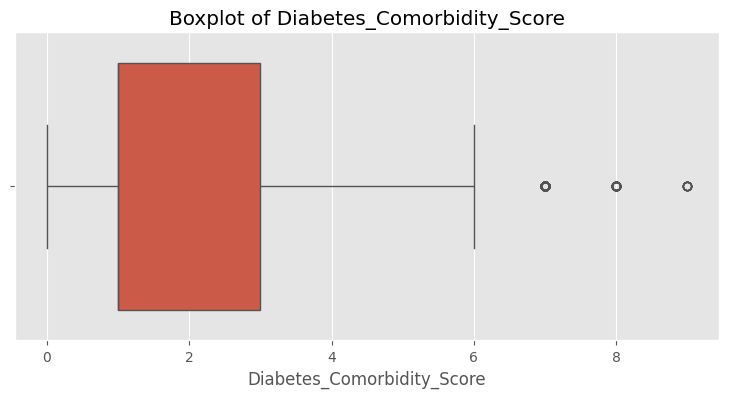

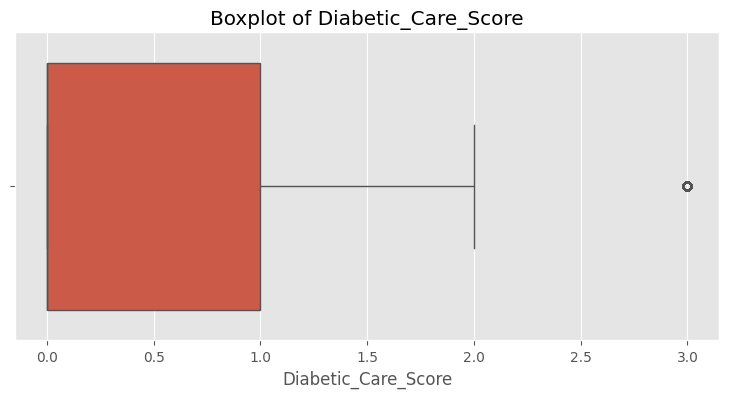

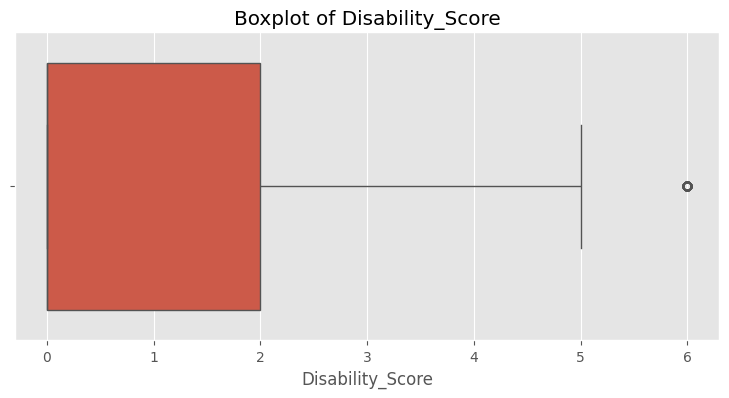

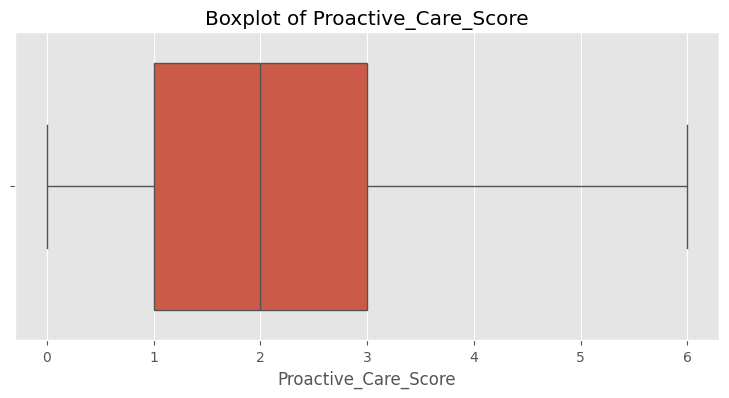

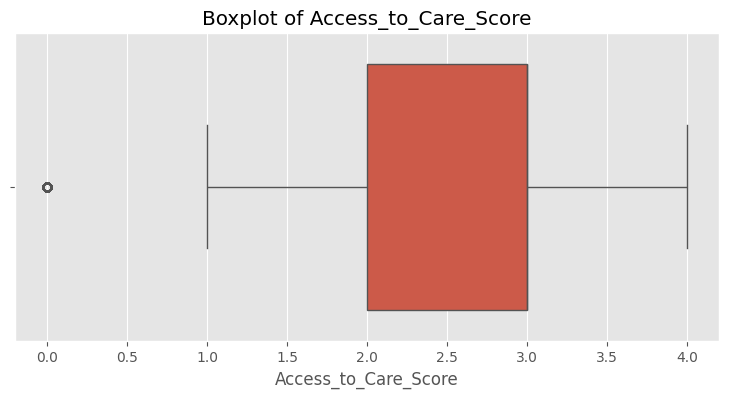

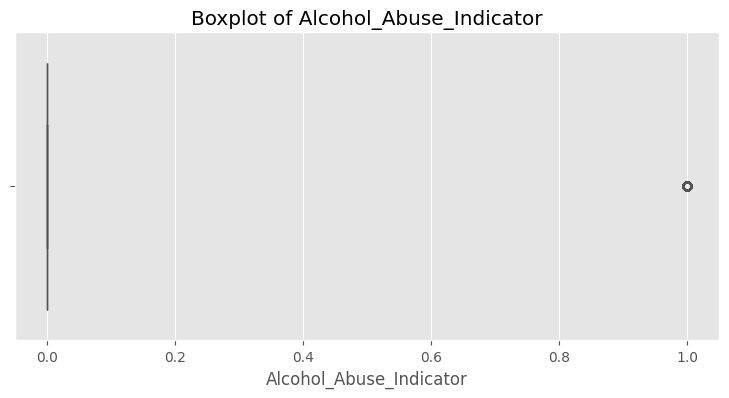

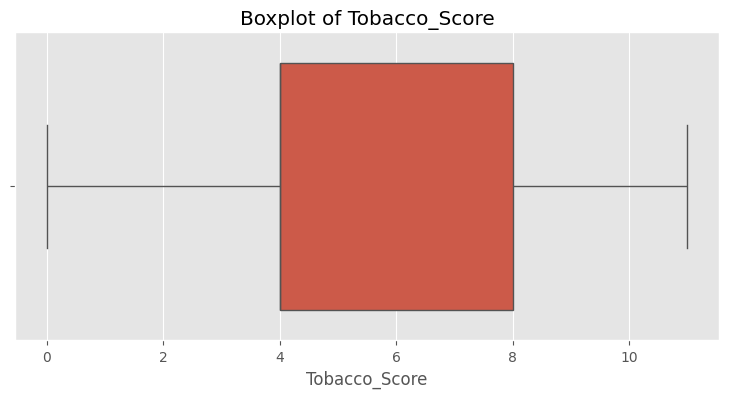

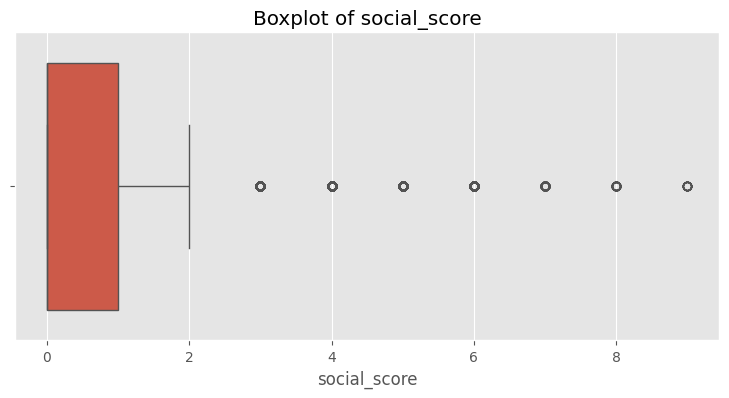

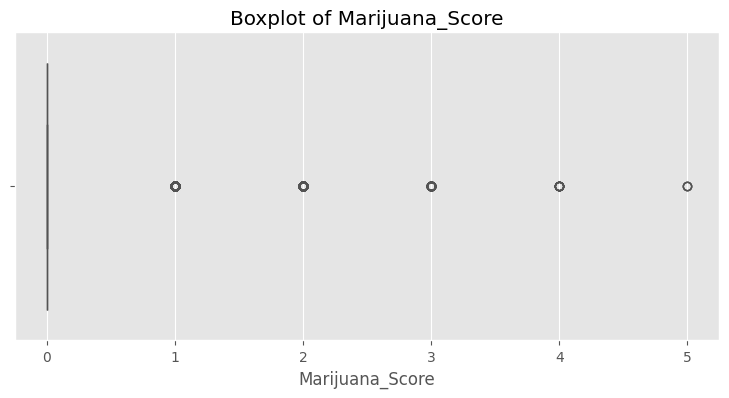

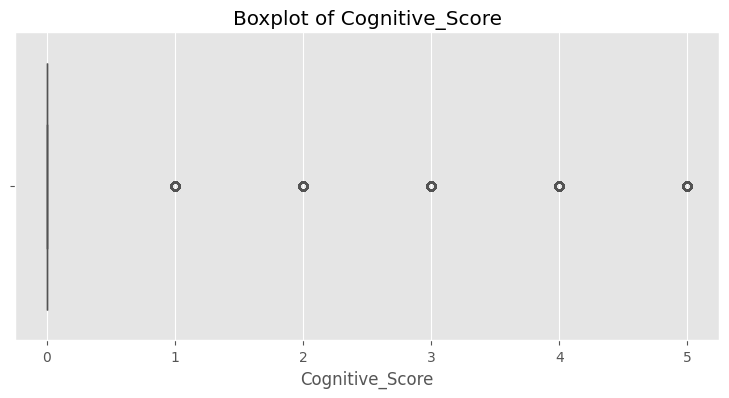

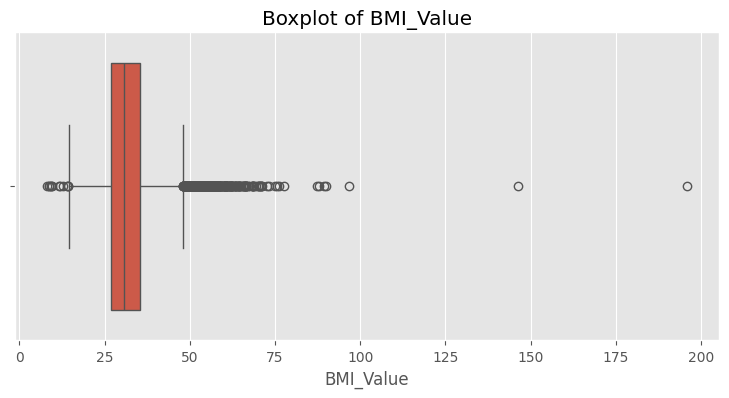

In [22]:
#plot boxplots of all continuous features
plt.style.use('ggplot')
for column in filter_conf:
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

## Correlations

In [23]:
#correlations
corr_matrix = df[filter_conf].corr()
corr_matrix

,SEXVAR,GENHLTH,PHYSHLTH,POORHLTH,EXERANY2,FALL12MN,FALLINJ5,_URBSTAT,_IMPRACE,_AGE80,...,Diabetic_Care_Score,Disability_Score,Proactive_Care_Score,Access_to_Care_Score,Alcohol_Abuse_Indicator,Tobacco_Score,social_score,Marijuana_Score,Cognitive_Score,BMI_Value
SEXVAR,1.000000,0.051369,0.046690,0.010678,0.101950,-0.000452,0.032615,0.003325,0.033611,-0.001591,...,-0.012866,0.070333,0.002116,-0.036022,-0.104237,-0.097199,0.057792,-0.011921,0.022889,0.061617
GENHLTH,0.051369,1.000000,0.547932,0.383690,0.258413,0.172846,0.146497,0.014114,0.106833,-0.043135,...,0.120734,0.432392,-0.060839,-0.216507,0.068284,0.063062,0.243250,0.028370,0.183594,0.148462
PHYSHLTH,0.046690,0.547932,1.000000,0.537846,0.255301,0.196537,0.170135,0.025914,0.022396,-0.006058,...,0.104030,0.458233,-0.028194,-0.203434,0.017516,0.076635,0.238253,0.046419,0.183572,0.100596
POORHLTH,0.010678,0.383690,0.537846,1.000000,0.237945,0.174830,0.133925,0.013105,0.012228,-0.013142,...,0.090328,0.440544,-0.026161,-0.189575,0.042223,0.067023,0.250707,0.049935,0.188036,0.073930
EXERANY2,0.101950,0.258413,0.255301,0.237945,1.000000,0.081868,0.056206,0.027242,0.024159,0.061398,...,0.041418,0.271168,-0.032316,-0.105583,0.048280,0.039660,0.119567,-0.010451,0.072459,0.119885
FALL12MN,-0.000452,0.172846,0.196537,0.174830,0.081868,1.000000,0.498338,0.039402,-0.000674,-0.011069,...,0.045473,0.263889,0.000045,-0.095930,0.013043,0.032024,0.159489,0.031743,0.149746,0.043238
FALLINJ5,0.032615,0.146497,0.170135,0.133925,0.056206,0.498338,1.000000,0.018274,0.042645,-0.072496,...,0.045031,0.195446,-0.019743,-0.091077,0.090237,0.005562,0.101811,0.024840,0.124520,0.089570
_URBSTAT,0.003325,0.014114,0.025914,0.013105,0.027242,0.039402,0.018274,1.000000,-0.076954,0.032858,...,0.008307,0.034448,-0.041484,0.001621,0.030323,0.015712,0.035061,0.058120,0.006176,0.020633
_IMPRACE,0.033611,0.106833,0.022396,0.012228,0.024159,-0.000674,0.042645,-0.076954,1.000000,-0.210815,...,0.020329,0.072901,-0.132470,-0.053282,0.136903,-0.065014,0.122503,0.012370,0.027011,-0.015715
_AGE80,-0.001591,-0.043135,-0.006058,-0.013142,0.061398,-0.011069,-0.072496,0.032858,-0.210815,1.000000,...,0.019045,0.072552,0.319239,-0.116888,-0.175046,0.039176,-0.226213,-0.100207,-0.013674,-0.270179


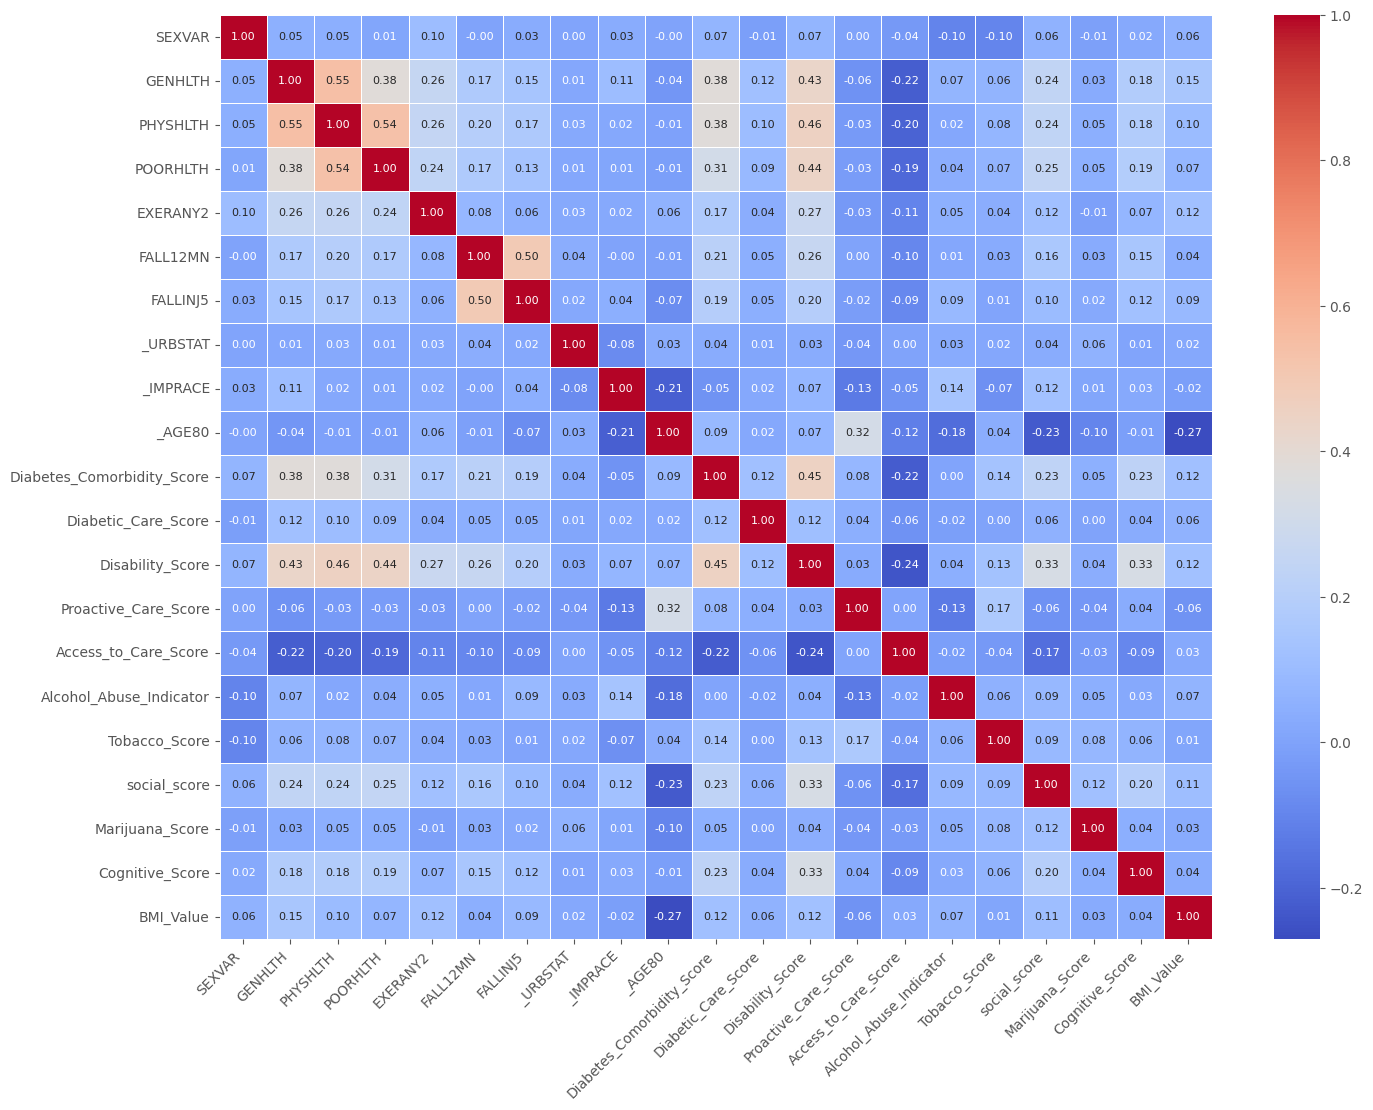

In [24]:
# Create a heatmap
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})

# Rotate the x and y labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the heatmap
plt.show()

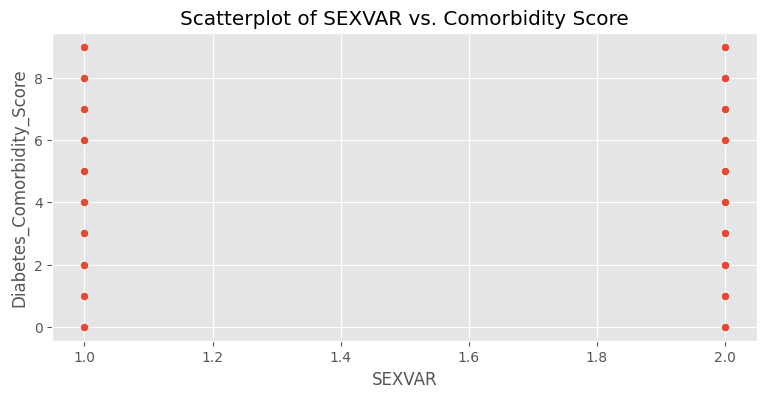

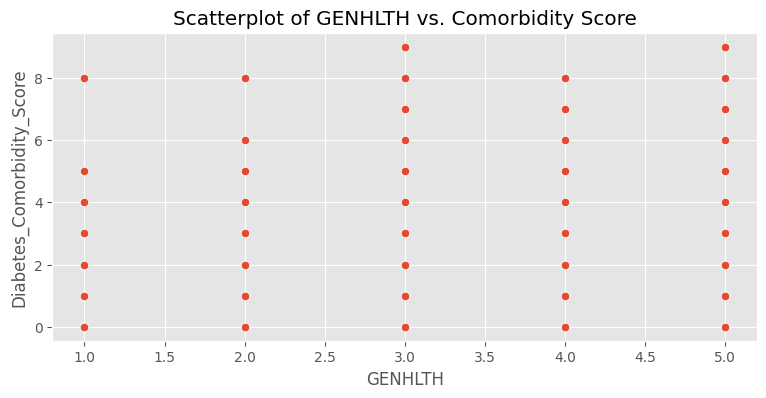

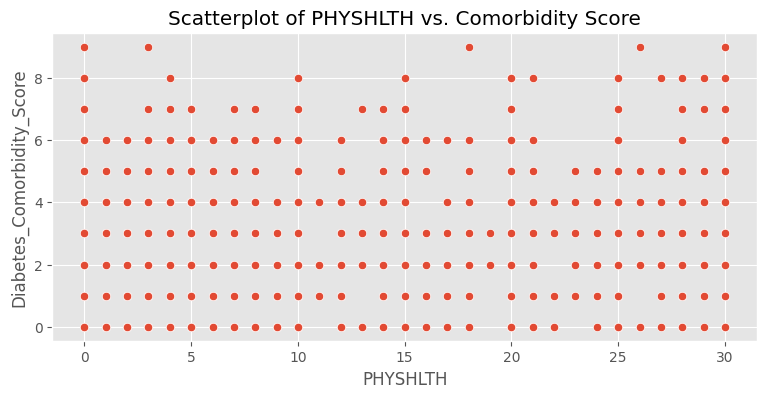

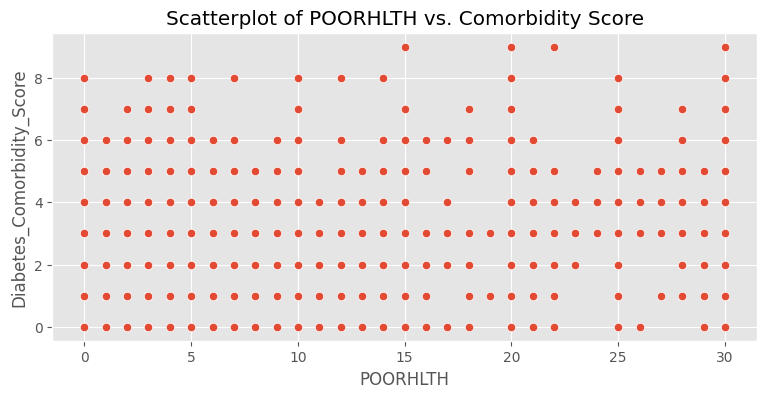

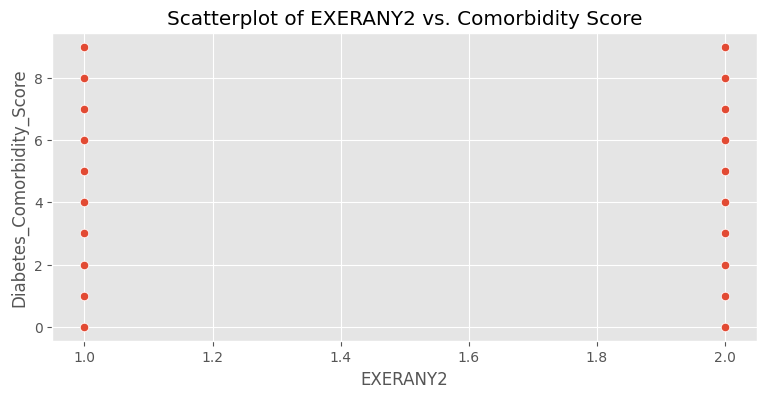

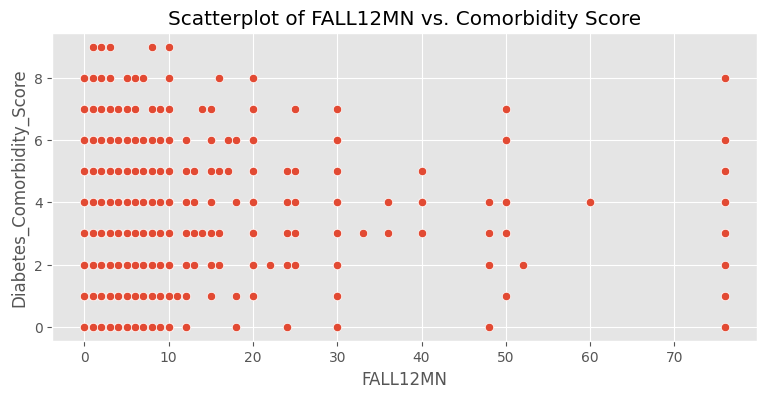

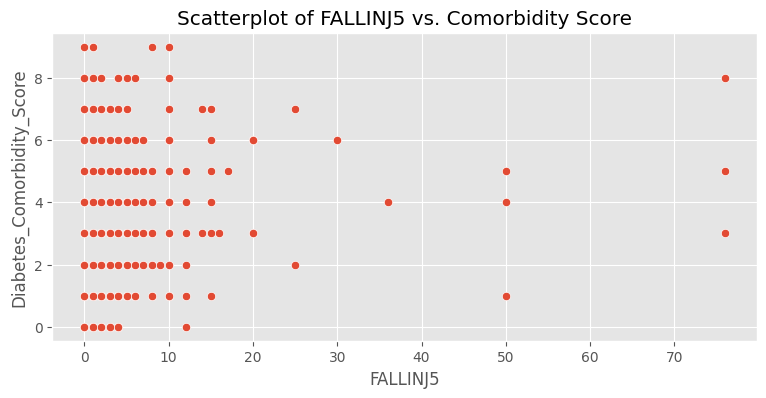

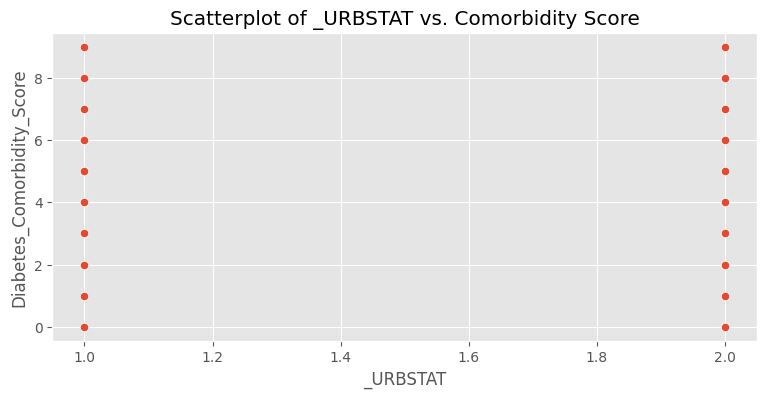

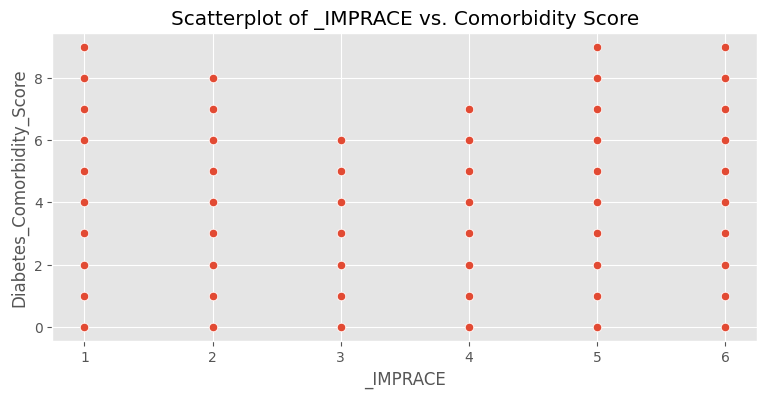

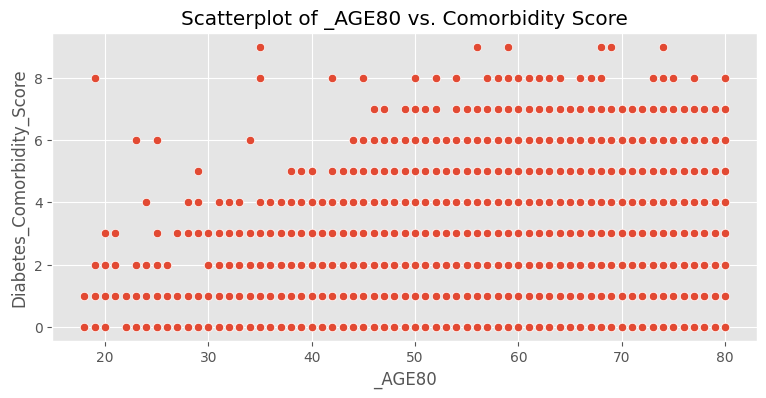

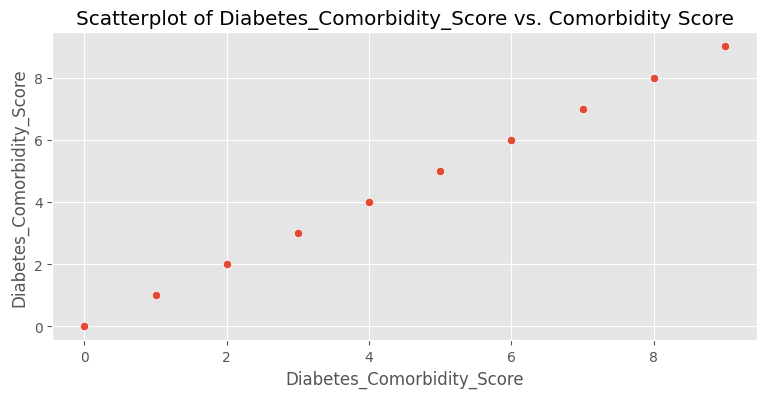

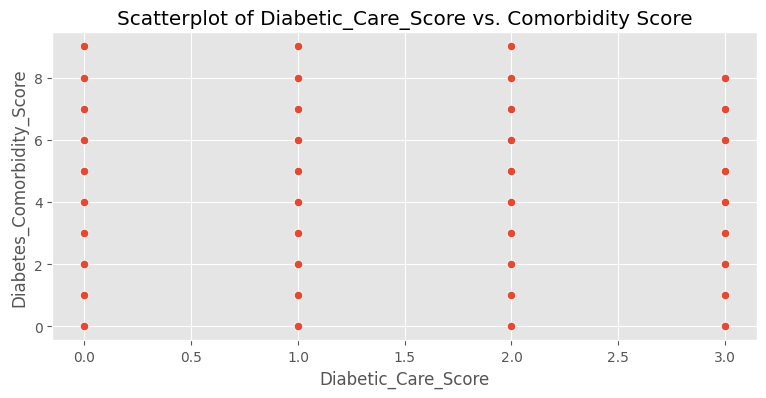

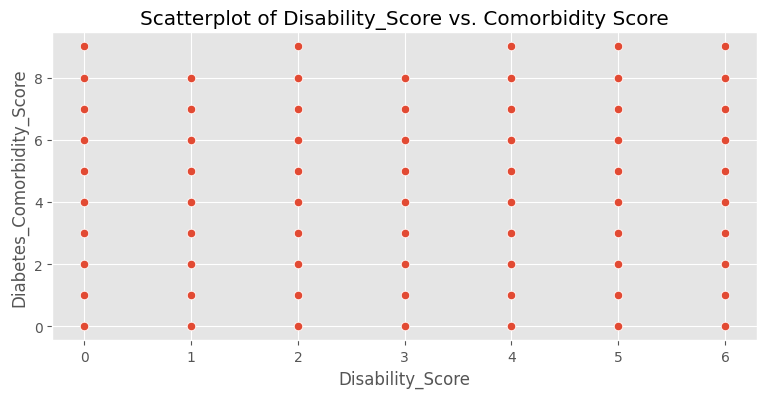

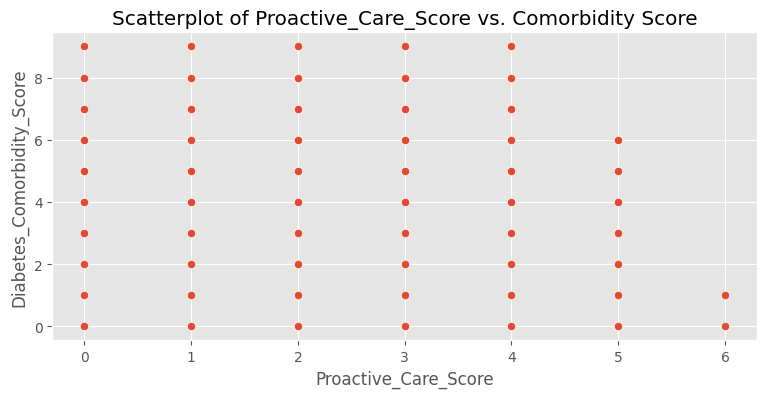

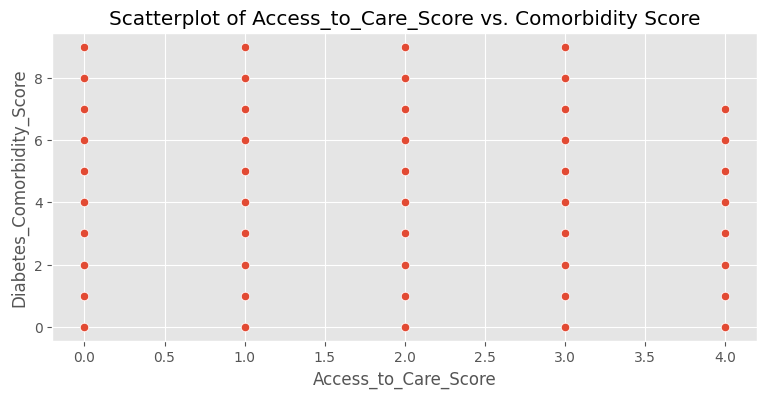

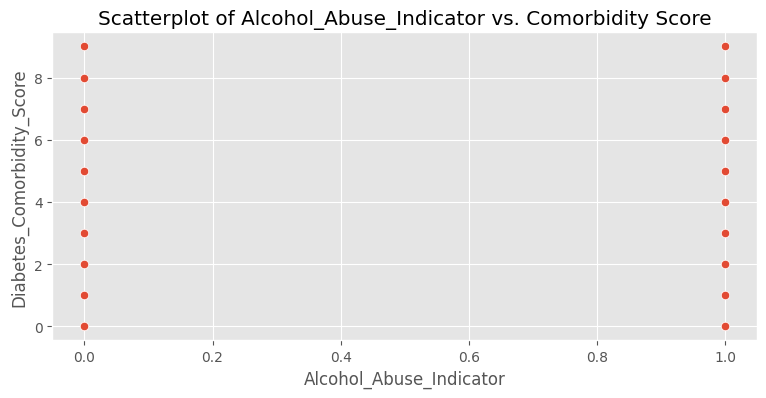

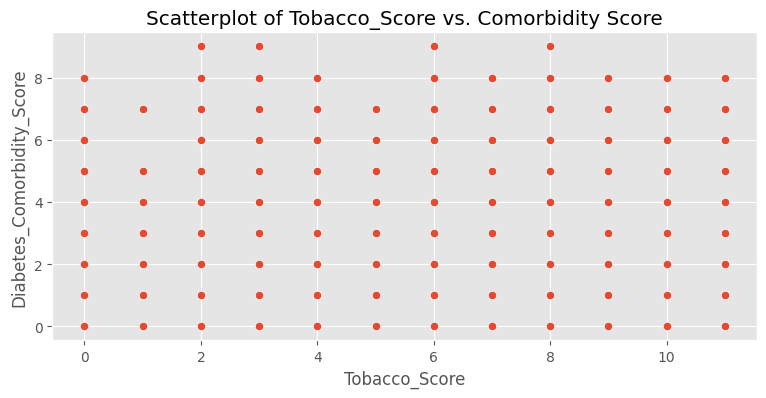

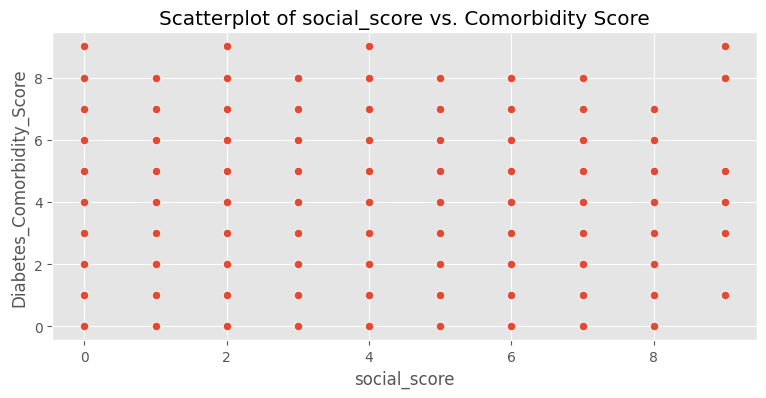

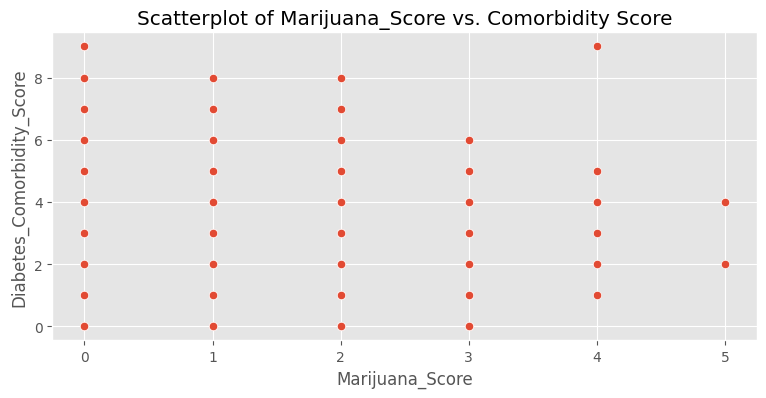

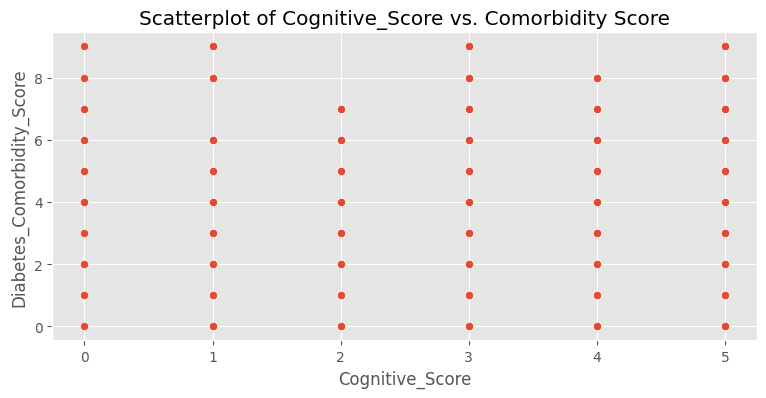

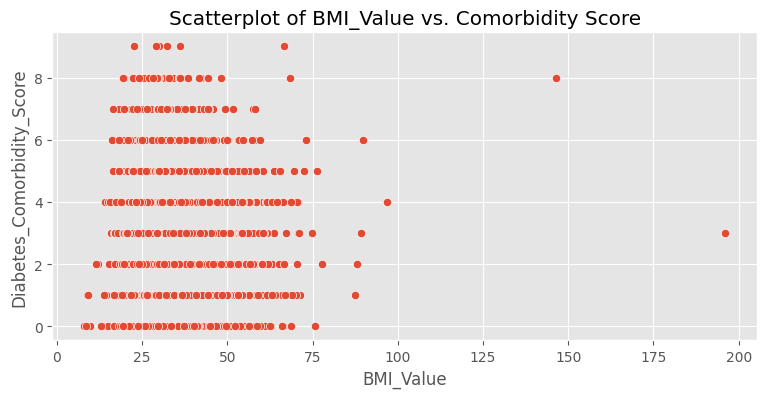

In [25]:
#plot scatterplots for continuous variables
plt.style.use('ggplot')
for column in filter_conf:
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=df[column], y=df['Diabetes_Comorbidity_Score'])
    plt.title(f'Scatterplot of {column} vs. Comorbidity Score')
    plt.show()